## Exercise 2 : Pendulum Simulation using Python: Example of a system

### What This exercise is about:
Desogning a model predictive controller for an invented pendulum system with an adjustable cart.
### What you shoyld be able to do:  
- Design a model predictive for an inverted pendulum with an adjustable cart.
- Demonstrate that the cart can perform a sequence of moves to maneuver from position y = -1.0 to y =0.0 within 6.2 seconds.

### Introduction:
Design a model predictive controller for an inverted pendulum system with an adjustable cart. Demonstrate that the cart can perform a sequence of moves to maneuver from position y=-1.0 to y=0.0 within 6.2 seconds. Verify that v, θ, and q are zero before and after the maneuver

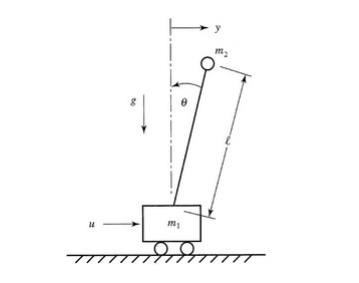

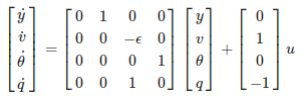

where u is the force applied to the cart, ε is m2/(m1+m2), y is the position of the cart, v is the velocity of the cart, θ is the angle of the pendulum relative to the cart, m1=10, m2=1, and q is the rate of angle change. Tune the controller to minimize the use of force applied to the cart either in the forward or reverse direction (i.e. minimize fuel consumed to perform the maneuver). Explain the tuning and the optimal solution with appropriate plots that demonstrate that the solution is optimal

In [ ]:
import matplotlib.animation as anm
import numpy as np
from gekko import GEKKO
#Defining a model
m = GEKKO()
#Weight of item
m2 = 1
#Defining the time, we will go beyond the 6.2s
#to check if the objective was achieved
m.time = np.linspace(0,8,100)
end_loc = int(100.0*6.2/8.0)
#parameter
m1a = m.Param(value=10)
m2a = m.Param(value=m2)
final = np.zeros(len(m.time))
for i in range (len(m.time)):
  if m.time[i]< 6.2:
    final[i] = 0
  else:
    final[i] = 1
final = m.Param(value=final)
#MV
ua = m.Var(value=0)
#State Variables
theta_A = m.Var(value=0)
qa = m.Var(value=0)
ya = m.Var(value=-1)
va = m.Var(value=0)
#intermediate
epsilon = m.Intermediate(m2a/(m1a+m2a))
#Defining the State Space Model
m.Equation(ya.dt() == va)
m.Equation(va.dt() == -epsilon*theta_A + ua)
m.Equation(theta_A.dt() == qa)
m.Equation(qa.dt() == theta_A -ua)

In [ ]:
#Definine the objective
#Make all the state variable be zero at time >=6.2
m.Obj(final*ya**2)
m.Obj(final*va**2)
m.Obj(final*theta_A**2)
m.Obj(final*qa**2)

m.fix(ya,pos=end_loc,val=0.0)
m.fix(va,pos=end_loc,val=0.0)
m.fix(theta_A,pos=end_loc,val=0.0)
m.fix(qa,pos=end_loc,val=0.0)

apm 35.227.8.16_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            8
   Intermediates:            1
   Connections  :            8
   Equations    :           10
   Residuals    :            9
 
 Number of state variables:            883
 Number of total equations: -          792
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :             91
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt,

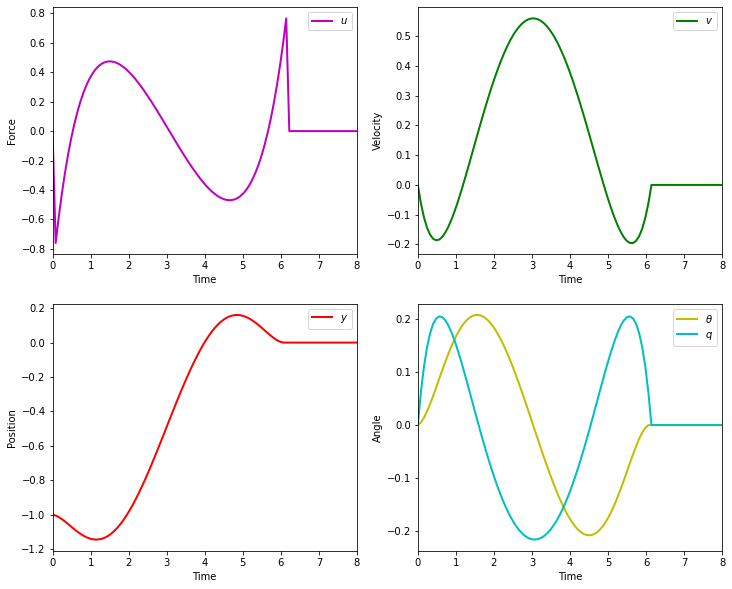

In [ ]:
#Try to minimize change of MV over all horizon
m.Obj(0.001*ua**2)

m.options.IMODE = 6 #MPC
m.solve() #(disp=False)
#Plotting the results
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.plot(m.time,ua.value,'m',lw=2)
plt.legend([r'$u$'],loc=1)
plt.ylabel('Force')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.subplot(222)
plt.plot(m.time,va.value,'g',lw=2)
plt.legend([r'$v$'],loc=1)
plt.ylabel('Velocity')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.subplot(223)
plt.plot(m.time,ya.value,'r',lw=2)
plt.legend([r'$y$'],loc=1)
plt.ylabel('Position')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.subplot(224)
plt.plot(m.time,theta_A.value,'y',lw=2)
plt.plot(m.time,qa.value,'c',lw=2)
plt.legend([r'$\theta$',r'$q$'],loc=1)
plt.ylabel('Angle')
plt.xlabel('Time')
plt.xlim(m.time[0],m.time[-1])
plt.rcParams['animation.html'] = 'html5'
x1 = ya.value
y1 = np.zeros(len(m.time))


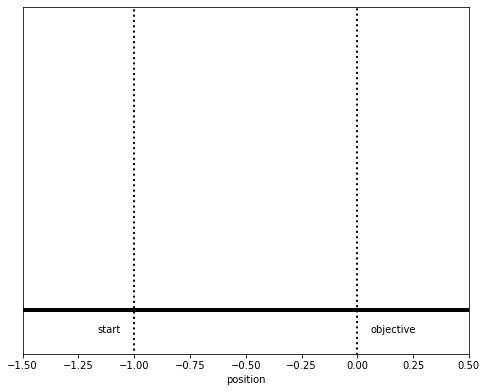

In [ ]:
#suppose that l = 1
x2 = 1*np.sin(theta_A.value)+x1
x2b = 1.05*np.sin(theta_A.value)+x1
y2 = 1*np.cos(theta_A.value)-y1
y2b = 1.05*np.cos(theta_A.value)-y1
fig = plt.figure(figsize=(8,6.4))
ax = fig.add_subplot(111,autoscale_on=False,\
xlim=(-1.5,0.5),ylim=(-0.4,1.2))
ax.set_xlabel('position')
ax.get_yaxis().set_visible(False)
crane_rail, = ax.plot([-1.5,0.5],[-0.2,-0.2],'k-',lw=4)
start, = ax.plot([-1,-1],[-1.5,1.5],'k:',lw=2)
objective, = ax.plot([0,0],[-0.5,1.5],'k:',lw=2)
mass1, = ax.plot([],[],linestyle='None',marker='s',\
          markersize=40,markeredgecolor='k',\
          color='orange',markeredgewidth=2)
mass2, = ax.plot([],[],linestyle='None',marker='o',\
          markersize=20,markeredgecolor='k',\
          color='orange',markeredgewidth=2)
line, = ax.plot([],[],'o-',color='orange',lw=4,\
        markersize=6,markeredgecolor='k',\
        markerfacecolor='k')
time_template = 'time = %.1fs'
time_text = ax.text(0.05,0.9,'',transform=ax.transAxes)
start_text = ax.text(-1.06,-0.3,'start',ha='right')
end_text = ax.text(0.06,-0.3,'objective',ha='left')
def init():
  mass1.set_data([],[])
  mass2.set_data([],[])
  line.set_data([],[])
  time_text.set_text('')
  return line, mass1, mass2, time_text
def animate(i):
    mass1.set_data([x1[i]],[y1[i]-0.1])
    mass2.set_data([x2b[i]],[y2b[i]])
    line.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    time_text.set_text(time_template % m.time[i])
    return line, mass1, mass2, time_text

ani_a = anm.FuncAnimation(fig, animate, \
        np.arange(1,len(m.time)), \
        interval=40,blit=False,init_func=init)
#requires ffmpeg to save mp4 file
#available from https://ffmpeg.zeranoe.com/builds/
#add ffmpeg.exeto path such as C:\ffmpeg\bin\ in
#environment variables
ani_a.save('Pendulum_Control.mp4',fps=30)
plt.show()